In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from itertools import product

pd.set_option('display.max_rows', 15)
np.random.seed(5)


np.random.seed(5)

sns.set()

In [2]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [3]:
batter=pd.read_csv('/content/batter_for_clustering.csv')

In [5]:
batter_for_clustering = batter.copy().drop(['name','team','prelim_metric','pre-rank'],axis=1)
batter_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,38.66,131.97,0.161,4.004,0.152,14.557,0.291
1,35.25,127.14,0.173,4.163,0.131,12.602,0.249
2,29.72,131.14,0.174,3.488,0.115,10.127,0.187
3,40.52,139.77,0.191,4.886,0.120,13.571,0.380
4,32.51,136.73,0.175,3.545,0.150,11.430,0.205
...,...,...,...,...,...,...,...
123,21.29,121.09,0.156,2.062,0.250,7.031,0.062
124,33.73,130.07,0.147,2.591,0.318,10.545,0.182
125,22.95,120.81,0.191,3.478,0.043,6.304,0.174
126,19.34,129.63,0.155,2.222,0.037,8.259,0.111


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
batter_for_clustering_scaled= scaler.fit_transform(batter_for_clustering)

In [7]:
batter_for_clustering_scaled


array([[ 1.43113350e+00, -2.06483633e-01, -5.26760895e-01,
         8.35428499e-01, -2.19343837e-01,  1.89997864e+00,
         1.44368018e+00],
       [ 9.63071767e-01, -5.64626493e-01, -1.50433111e-01,
         9.83591914e-01, -4.08681098e-01,  1.22536524e+00,
         1.02058681e+00],
       [ 2.04015637e-01, -2.68027851e-01, -1.19072463e-01,
         3.54596285e-01, -5.52938060e-01,  3.71315040e-01,
         3.96020423e-01],
       [ 1.68643990e+00,  3.71883719e-01,  4.14058564e-01,
         1.65731612e+00, -5.07857759e-01,  1.55973884e+00,
         2.34023516e+00],
       [ 5.86975239e-01,  1.46468751e-01, -8.77118141e-02,
         4.07711472e-01, -2.37375957e-01,  8.20942279e-01,
         5.77346150e-01],
       [ 1.49427380e+00,  2.05788480e-01, -5.26760895e-01,
        -3.92743705e-01,  2.15187997e+00,  3.10927652e-01,
        -4.30018997e-01],
       [ 1.57663070e+00,  1.05331910e+00,  1.57440256e+00,
         2.13348911e+00, -5.70970180e-01, -1.69410886e-01,
         1.5847113

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

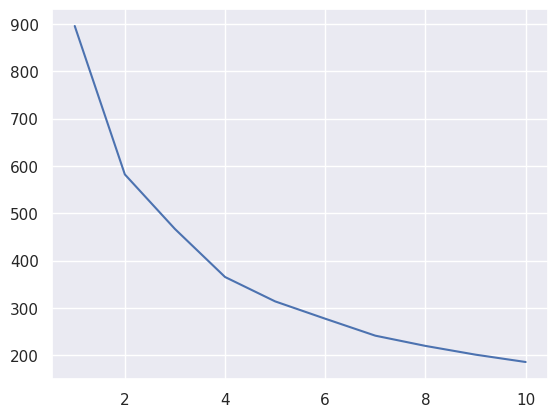

In [8]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_for_clustering_scaled)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [9]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(batter_for_clustering_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
ypred_kmeans

array([0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 0, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 0, 3, 0, 1, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 1, 3, 2, 1, 2, 2, 3, 0, 2, 3, 1, 1, 2, 2, 1, 3, 1,
       0, 1, 2, 1, 3, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1, 3, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 1, 2, 3, 3, 3, 1, 3, 2, 3, 2, 2, 1, 2, 3, 2,
       2, 3, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3], dtype=int32)

In [11]:
results = batter
results['kmeans'] = ypred_kmeans

In [13]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.2, random_state=42)
X_train.drop(['name','team','prelim_metric','pre-rank'],axis=1,inplace=True)
X_test.drop(['name','team','prelim_metric','pre-rank'],axis=1,inplace=True)

In [14]:
X_train = scaler.fit_transform(X_train)


In [15]:
X_train


array([[-6.82793046e-01,  5.17888170e-01,  6.20162886e-01,
        -1.78485023e-01, -6.78411207e-01, -7.38012382e-01,
        -3.53136021e-01],
       [-3.24302734e-01, -8.04062717e-01, -1.31399926e+00,
        -8.93520449e-01,  6.42258423e-01, -6.63080629e-03,
        -8.61774012e-01],
       [-5.25274576e-01,  9.58043630e-01,  1.76163563e+00,
         6.99481654e-01, -1.57886777e+00, -5.35751272e-01,
         3.94250416e-01],
       [ 1.47358050e+00, -1.91704782e-01, -5.21309854e-01,
         9.03378475e-01, -2.75349697e-01,  1.92616150e+00,
         1.57761227e+00],
       [ 3.89962056e-01,  3.27129395e-01, -7.74037887e-02,
         3.62446726e-01, -5.75501886e-01,  6.87945325e-01,
         5.29195189e-01],
       [ 1.03904679e+00, -6.63777081e-01, -9.65215920e-01,
         1.86480976e-01,  3.16378904e-01,  1.41358660e+00,
         9.85931345e-01],
       [-1.14991679e+00, -3.65391760e-01, -7.11555311e-01,
        -7.55727164e-01, -1.26156403e+00, -2.00450300e-01,
        -2.9085381

In [16]:
model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(6, input_shape=(7,), activation='relu'))
model.add(Dense(6, input_shape=(7,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [18]:
model.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 2/150
11/11 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 4/150
11/11 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 5/150
11/11 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 6/150
11/11 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 7/150
11/11 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 8/150
11/11 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 9/150
11/11 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3529
Epoch 10/150
11/11 [==============================] - 0s 7ms/step - loss: 0.0000e+00 

In [19]:
accuracy = model.evaluate(X_train, y_train, verbose=0)


In [20]:
accuracy

[0.0, 0.3529411852359772]